In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("matches.csv")

In [8]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [9]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
df1 = df.drop(['match_type','result', 'city', 'result_margin', 'target_runs', 'target_overs', 'super_over','method', 'umpire1', 'umpire2','date','id','toss_decision'],axis=1)

In [11]:
df1.head()

,season,player_of_match,venue,team1,team2,toss_winner,winner
0,2007/08,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,2007/08,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,2007/08,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,2007/08,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,2007/08,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           1095 non-null   object
 1   player_of_match  1090 non-null   object
 2   venue            1095 non-null   object
 3   team1            1095 non-null   object
 4   team2            1095 non-null   object
 5   toss_winner      1095 non-null   object
 6   winner           1090 non-null   object
dtypes: object(7)
memory usage: 60.0+ KB


In [13]:
df1.isnull().sum()

season             0
player_of_match    5
venue              0
team1              0
team2              0
toss_winner        0
winner             5
dtype: int64

In [14]:
df1.fillna(value = {'winner':'Unknown','player_of_match':'Unknown'},inplace= True)

In [15]:
df1.isnull().sum()

season             0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
winner             0
dtype: int64

In [16]:
df1.head()

,season,player_of_match,venue,team1,team2,toss_winner,winner
0,2007/08,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,2007/08,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,2007/08,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,2007/08,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,2007/08,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders


<Axes: xlabel='toss_winner', ylabel='Count'>

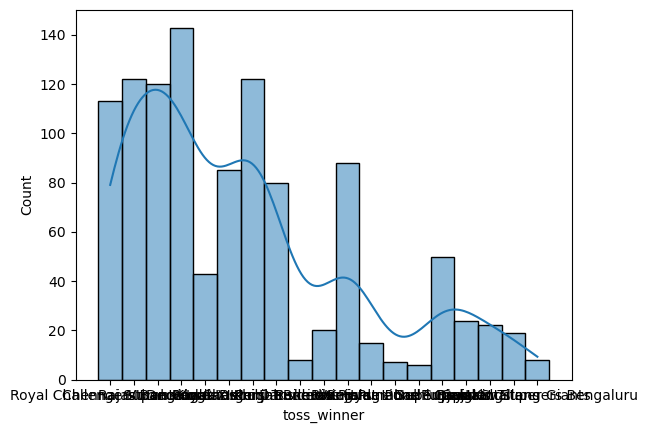

In [17]:
sns.histplot(df1['toss_winner'],bins =20,kde= True)

<Axes: xlabel='winner', ylabel='count'>

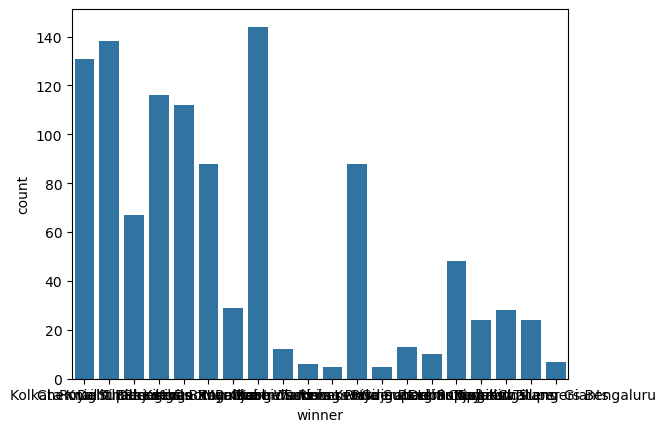

In [18]:
sns.countplot(x = df1["winner"])

In [19]:
df1 = pd.get_dummies(df1,columns=['team1','team2','winner','player_of_match','venue','toss_winner'])

In [20]:
df1


,season,team1_Chennai Super Kings,team1_Deccan Chargers,team1_Delhi Capitals,team1_Delhi Daredevils,team1_Gujarat Lions,team1_Gujarat Titans,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,...,toss_winner_Lucknow Super Giants,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Punjab Kings,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Royal Challengers Bengaluru,toss_winner_Sunrisers Hyderabad
0,2007/08,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2007/08,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2007/08,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2007/08,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2007/08,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1091,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1092,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1093,2024,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [21]:

df1['season'] = df1['season'].apply(lambda x: int(x.split('/')[0]))

df1 = df1.astype(int)

In [22]:
df1


,season,team1_Chennai Super Kings,team1_Deccan Chargers,team1_Delhi Capitals,team1_Delhi Daredevils,team1_Gujarat Lions,team1_Gujarat Titans,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,...,toss_winner_Lucknow Super Giants,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Punjab Kings,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Royal Challengers Bengaluru,toss_winner_Sunrisers Hyderabad
0,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2007,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2007,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2024,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1091,2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1092,2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1093,2024,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
scaler = StandardScaler()


df1['season'] = scaler.fit_transform(df1[['season']])




In [25]:
df1

,season,team1_Chennai Super Kings,team1_Deccan Chargers,team1_Delhi Capitals,team1_Delhi Daredevils,team1_Gujarat Lions,team1_Gujarat Titans,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,...,toss_winner_Lucknow Super Giants,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Punjab Kings,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Royal Challengers Bengaluru,toss_winner_Sunrisers Hyderabad
0,-1.765973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.765973,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.765973,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.765973,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.765973,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1.562998,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1091,1.562998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1092,1.562998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1093,1.562998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:

y = df1.filter(regex='^winner_')


x = df1.drop(y.columns, axis=1)

print(f"Shape of x (features): {x.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of x (features): (1095, 408)
Shape of y (target): (1095, 20)


In [27]:
y

,winner_Chennai Super Kings,winner_Deccan Chargers,winner_Delhi Capitals,winner_Delhi Daredevils,winner_Gujarat Lions,winner_Gujarat Titans,winner_Kings XI Punjab,winner_Kochi Tuskers Kerala,winner_Kolkata Knight Riders,winner_Lucknow Super Giants,winner_Mumbai Indians,winner_Pune Warriors,winner_Punjab Kings,winner_Rajasthan Royals,winner_Rising Pune Supergiant,winner_Rising Pune Supergiants,winner_Royal Challengers Bangalore,winner_Royal Challengers Bengaluru,winner_Sunrisers Hyderabad,winner_Unknown
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1091,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1092,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
model = LogisticRegression(solver='liblinear') # 'liblinear' solver is good for small datasets and handles L1/L2 penalties
# Convert y_train from one-hot encoded to single label by getting the index of the '1'
y_train_labels = y_train.idxmax(axis=1)

model.fit(x_train, y_train_labels)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [32]:
y_pred = model.predict(x_test)

In [33]:
# Convert y_test from one-hot encoded to single label format
y_test_labels = y_test.idxmax(axis=1)

acc = accuracy_score(y_test_labels, y_pred)
print(acc)

0.684931506849315


In [34]:
import joblib

joblib.dump(model, "ipl_model.pkl")          # trained LogisticRegression
joblib.dump(scaler, "season_scaler.pkl")     # StandardScaler used on season
joblib.dump(x.columns.tolist(), "x_cols.pkl")# feature columns order

['x_cols.pkl']